By Nitish Adhikari

Email id :nitishbuzzpro@gmail.com, +91-9650740295
    
Linkedin : https://www.linkedin.com/in/nitish-adhikari-6b2350248 

# PROJECT : Cat & Dog Classification using Convolutional Neural Network 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

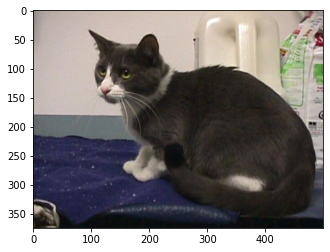

In [57]:
#Upload image of cat number 4
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [58]:
#image shape
cat4.shape

(375, 500, 3)

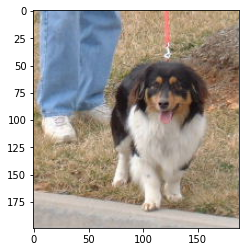

In [59]:
#Upload image of dog number 4
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog  = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [60]:
#image shape
dog.shape

(199, 188, 3)

# PREPROCESSING

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [62]:
#create an ImageDataGenerator object
image_gen = ImageDataGenerator(rotation_range=30,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                shear_range=0.2,
                                zoom_range=0.2,
                                fill_mode='nearest',
                                horizontal_flip=True,
                                vertical_flip=False,
                                rescale=1/255)

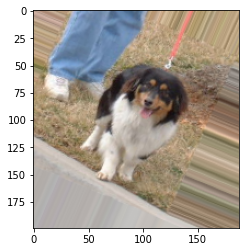

In [63]:
plt.imshow(image_gen.random_transform(dog))

In [64]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


# CREATE MODEL

In [65]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [66]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [8]:
batch_size = 16

In [68]:

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=(150,150),
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [69]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=(150,150),
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [70]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [71]:
result = model.fit_generator(train_image_gen,epochs=100,steps_per_epoch=150,
                            validation_data=test_image_gen,validation_steps=12)

Epoch 1/100
150/150 [==============================] - 116s 762ms/step - loss: 0.6967 - accuracy: 0.5111 - val_loss: 0.6955 - val_accuracy: 0.5156
Epoch 2/100
150/150 [==============================] - 108s 721ms/step - loss: 0.6922 - accuracy: 0.5379 - val_loss: 0.6888 - val_accuracy: 0.6094
Epoch 3/100
150/150 [==============================] - 115s 767ms/step - loss: 0.6873 - accuracy: 0.5612 - val_loss: 0.6717 - val_accuracy: 0.5156
Epoch 4/100
150/150 [==============================] - 93s 619ms/step - loss: 0.6718 - accuracy: 0.5958 - val_loss: 0.6809 - val_accuracy: 0.5573
Epoch 5/100
150/150 [==============================] - 90s 600ms/step - loss: 0.6799 - accuracy: 0.5829 - val_loss: 0.6957 - val_accuracy: 0.5208
Epoch 6/100
150/150 [==============================] - 92s 612ms/step - loss: 0.6750 - accuracy: 0.5858 - val_loss: 0.6544 - val_accuracy: 0.6042
Epoch 7/100
150/150 [==============================] - 88s 585ms/step - loss: 0.6506 - accuracy: 0.6350 - val_loss: 0.642

Epoch 57/100
150/150 [==============================] - 97s 645ms/step - loss: 0.4564 - accuracy: 0.7788 - val_loss: 0.3832 - val_accuracy: 0.8490
Epoch 58/100
150/150 [==============================] - 84s 559ms/step - loss: 0.4494 - accuracy: 0.7858 - val_loss: 0.4484 - val_accuracy: 0.7917
Epoch 59/100
150/150 [==============================] - 88s 587ms/step - loss: 0.4411 - accuracy: 0.8083 - val_loss: 0.5416 - val_accuracy: 0.7240
Epoch 60/100
150/150 [==============================] - 97s 649ms/step - loss: 0.4363 - accuracy: 0.8000 - val_loss: 0.4394 - val_accuracy: 0.8125
Epoch 61/100
150/150 [==============================] - 82s 549ms/step - loss: 0.4152 - accuracy: 0.8125 - val_loss: 0.4702 - val_accuracy: 0.7969
Epoch 62/100
150/150 [==============================] - 84s 560ms/step - loss: 0.4243 - accuracy: 0.8092 - val_loss: 0.4192 - val_accuracy: 0.7812
Epoch 63/100
150/150 [==============================] - 81s 537ms/step - loss: 0.4228 - accuracy: 0.8058 - val_loss: 0

# EVALUATING THE MODEL

In [72]:
result.history['accuracy']

[0.5110832452774048,
 0.5379166603088379,
 0.5612499713897705,
 0.5958333611488342,
 0.5829166769981384,
 0.5858333110809326,
 0.6349999904632568,
 0.6366666555404663,
 0.6604166626930237,
 0.6479166746139526,
 0.6616666913032532,
 0.65625,
 0.6766666769981384,
 0.6858333349227905,
 0.7030531167984009,
 0.6937500238418579,
 0.7172731161117554,
 0.699999988079071,
 0.7195833325386047,
 0.7370833158493042,
 0.7162500023841858,
 0.6983333230018616,
 0.7304166555404663,
 0.7268925309181213,
 0.7329166531562805,
 0.7262499928474426,
 0.731249988079071,
 0.7395833134651184,
 0.7391666769981384,
 0.7524999976158142,
 0.7433333396911621,
 0.7450000047683716,
 0.7641666531562805,
 0.7662066221237183,
 0.7570833563804626,
 0.7462499737739563,
 0.7754077911376953,
 0.7637500166893005,
 0.7516666650772095,
 0.7666666507720947,
 0.7554166913032532,
 0.7712500095367432,
 0.7595833539962769,
 0.7674999833106995,
 0.7716666460037231,
 0.7917189598083496,
 0.7891666889190674,
 0.79708331823349,
 0.8016

In [74]:
#save the model
model.save('cat_dog_100epochs.h5')

# PREDICTING ON NEW IMAGES

In [9]:
#importing the saved model
from keras.models import load_model
new_model = load_model('cat_dog_100epochs.h5')

In [10]:
test_data_gen = ImageDataGenerator(rescale=1/255)
genrated_test_images = test_data_gen.flow_from_directory(
                                                        'CATS_DOGS/test',
                                                        target_size=(150, 150),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

Found 6251 images belonging to 2 classes.


In [11]:
genrated_test_images.class_indices

{'CAT': 0, 'DOG': 1}

In [12]:
predictions = new_model.predict(genrated_test_images)

391/391 [==============================] - 294s 752ms/step


In [13]:
predictions

array([[0.18466547],
       [0.3501265 ],
       [0.99689215],
       ...,
       [0.77171296],
       [0.26374152],
       [0.04919095]], dtype=float32)

In [14]:
predictions.shape

(6251, 1)

In [15]:
class_prediction = (predictions >= 0.5).astype('int')
class_prediction

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [16]:
class_prediction.shape

(6251, 1)

In [17]:
actual_classes = genrated_test_images.classes
actual_classes

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
actual_classes.shape

(6251,)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(confusion_matrix(actual_classes,class_prediction))

[[1513 1613]
 [1540 1585]]


In [21]:
print(classification_report(actual_classes,class_prediction))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49      3126
           1       0.50      0.51      0.50      3125

    accuracy                           0.50      6251
   macro avg       0.50      0.50      0.50      6251
weighted avg       0.50      0.50      0.50      6251

